In [1]:
import os
from itertools import product
from astropy.io import fits
from astropy.table import Table
import numpy as np
from astropy.io import fits as fits
from astropy.wcs import WCS
from astropy.table import Table
import yaml
from yaml.loader import SafeLoader
import matplotlib.pyplot as plt
import numpy.ma as ma
import yaml
from yaml.loader import SafeLoader


In [2]:
from cmaps_CLC import vel_map

In [3]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [4]:
#
# Configure your entries here!
#
#CALDIR = '/home/sanchez/lvmdrp_scripts'
CALDIR = '/disk-a/sanchez/home/sda2/code/python/lvmcore/'
MDJ='/'
DATADIR = 'data/'
FILEID = '00006109'
file_sp1 = f'{DATADIR}/{MDJ}/lvm-object-sp1-{FILEID}.fits'
file_sp2 = f'{DATADIR}/{MDJ}/lvm-object-sp2-{FILEID}.fits'
file_sp3 = f'{DATADIR}/{MDJ}/lvm-object-sp3-{FILEID}.fits'
file_all =  f'{DATADIR}/{MDJ}/lvm-object-{FILEID}.fits'
file_all = f'{DATADIR}/lvmCFrame-{FILEID}.fits'

In [5]:
#
# Reading the YAML file
#
#fibermap=f'{CALDIR}/LVM_SAIT_fibermap.yaml'
fibermap=f'{CALDIR}/metrology/lvm_fiducial_fibermap.yaml'
with open(fibermap) as f:
    data = yaml.load(f, Loader=SafeLoader)

#print(data['schema'][0])
colnames=[]
coltype=[]
for schema in data['schema']:
    colnames.append(schema['name'])
    coltype_now=schema['dtype']
    if (coltype_now=='finblock'):
        coltype_now='str'
    if (schema['name']=='finblock'):
        coltype_now='str'
    if (schema['name']=='ringnum'):
        coltype_now='float'
    #print(coltype_now)


    coltype.append(coltype_now)
    #    print(schema['name'],schema['dtype'])
    
#print(data['schema'][0])

print(len(data['fibers'])/3)

tab=Table(np.array(data['fibers']),names=colnames,dtype=coltype)
#tab['targettype']
tab.columns

648.0


<TableColumns names=('fiberid','spectrographid','blockid','finblock','targettype','ifulabel','finifu','telescope','xpmm','ypmm','ringnum','orig_ifulabel','orig_slitlabel','finsector','fmap','ypix','fibstatus')>

(-7.5449, 7.5449, -8.712, 8.712)

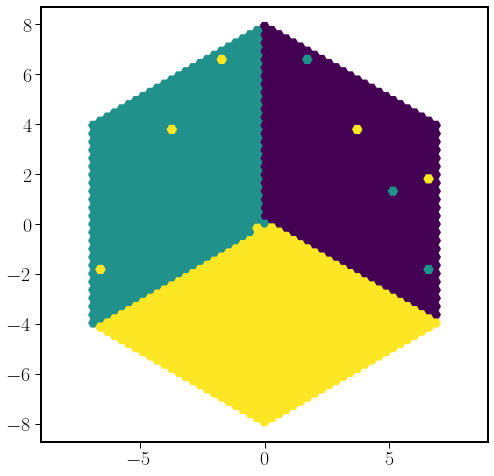

In [6]:
#
# Just a test plot
#
fig,ax = plt.subplots(1,1,figsize=(8,8))

# radius in data coordinates:
r = 0.25 # units
# radius in display coordinates:
r_ = ax.transData.transform([r,0])[0] - ax.transData.transform([0,0])[0] # points
# marker size as the area of a circle
marker_size = np.pi * r_**2

ax.scatter(tab['xpmm'],tab['ypmm'],c=tab['spectrographid'],s=r_,marker='H',edgecolor='None')
ax.axis('equal')


In [7]:
tab1=tab[tab['spectrographid']==1]
tab2=tab[tab['spectrographid']==2]
tab3=tab[tab['spectrographid']==3]
mask_sp1 = (tab1['spectrographid']==1) & (tab1['fibstatus']==0) & (tab1['targettype']!='standard') 
mask_sp2 = (tab2['spectrographid']==2) & (tab2['fibstatus']==0) & (tab2['targettype']!='standard') 
mask_sp3 = (tab3['spectrographid']==3) & (tab3['fibstatus']==0) & (tab3['targettype']!='standard') 
print(len(tab1),len(tab2),len(tab3))

648 648 648


In [8]:
mask1 = (tab['spectrographid']==1) & (tab['fibstatus']==0) & (tab['targettype']!='standard') 
tab1=tab[mask1]
mask2 = (tab['spectrographid']==2) & (tab['fibstatus']==0) & (tab['targettype']!='standard')
tab2=tab[mask2]
mask3 = (tab['spectrographid']==3) & (tab['fibstatus']==0) & (tab['targettype']!='standard')
tab3=tab[mask3]

mask_all = (tab['fibstatus']==0) & (tab['targettype']=='science') 

print(len(tab1),len(tab2),len(tab3),len(tab[mask_all]))

621 621 629 1754


In [27]:
#
# Reading files
#
hdu=fits.open(file_all)
hdu.info()
(ny,nx)=hdu[1].data.shape
hdr=hdu[1].header
W=WCS(hdu[1].header)
W.wcs.crval=W.wcs.crval*10000000000
W.wcs.cdelt=W.wcs.cdelt*10000000000
print(W)
        





Filename: data//lvmCFrame-00006109.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     301   ()      
  1  FLUX          1 ImageHDU        22   (12401, 1944)   float32   
  2  ERROR         1 ImageHDU         8   (12401, 1944)   float32   
  3  MASK          1 ImageHDU         8   (12401, 1944)   uint8   
  4  WAVE          1 ImageHDU         7   (12401,)   float32   
  5  FWHM          1 ImageHDU         8   (12401, 1944)   float32   
  6  SKY           1 ImageHDU         8   (12401, 1944)   float32   
  7  SKY_ERROR     1 ImageHDU         8   (12401, 1944)   float32   
  8  SUPERSKY      1 BinTableHDU     24   1458345R x 6C   [E, E, E, J, J, 4A]   
  9  SLITMAP       1 BinTableHDU     43   1944R x 17C   [K, K, 3A, K, 8A, 5A, K, 4A, D, D, D, 6A, 8A, K, 17A, K, K]   
WCS Keywords

Number of WCS axes: 2
CTYPE : 'WAVE'  'LINEAR'  
CRVAL : 3600.0  10000000000.0  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT

In [13]:
wl = W.wcs.crval[1]+W.wcs.cdelt[1]*(np.arange(nx)-1)


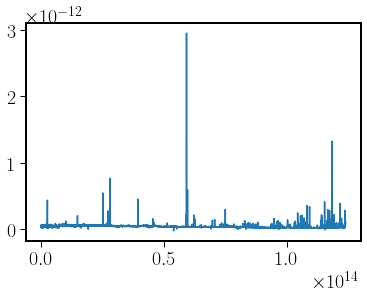

In [21]:
plt.plot(wl,hdu[1].data[347,:])
i_ha = int((6563-W.wcs.crval[0])/W.wcs.cdelt[0])
w_ha = 50
#plt.xlim(6400,6800)
#print(wl)
#print(wcs_sp1)

In [22]:
ha_s = hdu[1].data[:,i_ha-w_ha:i_ha+w_ha].sum(axis=1)
print(ha_s.shape)
#print(ha_sp3_s)

(1944,)


-10.985413 -10.985075 0.14637206


(-7.6, 7.6)

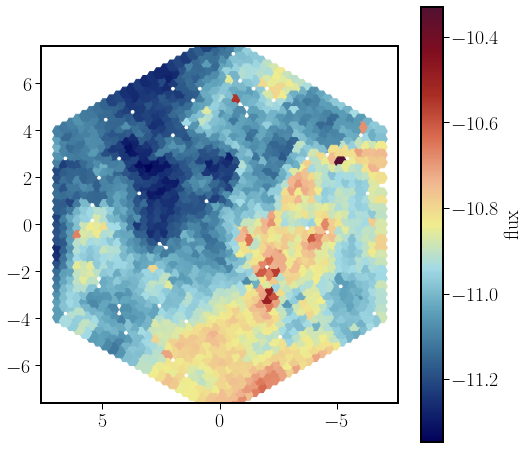

In [23]:
color_cm_now = vel_map()

fig,ax = plt.subplots(1,1,figsize=(8,8))
r = 0.35 # units
r_ = ax.transData.transform([r,0])[0] - ax.transData.transform([0,0])[0] # points
marker_size = np.pi * r_**2

c=np.log10(ha_s[mask_all])
tab_now=tab[mask_all]
x=(-1)*tab_now['xpmm']#[0:nmax]
y=tab_now['ypmm']#[0:nmax]
sc=ax.scatter(x,y,c=c,s=r_,marker='H',edgecolor=None,cmap=color_cm_now)#,vmin=0,vmax=5)#,norm=norm)
ax.axis('square')
cbar = fig.colorbar(sc,label=r'flux');
print(np.median(c),np.mean(c),np.std(c))
ax.set_xlim(7.6,-7.6)
ax.set_ylim(-7.6,7.6)



In [31]:
hdr_now=hdr
hdr_now['CRVAL1']=3600.0
hdr_now['CDELT1']=0.5
hdr_now['CRPIX1']=1.0
hdr_now['CUNIT1']='Angstrom'

phdu=fits.PrimaryHDU(data=hdu[1].data,header=hdr_now)
phdu.writeto('data/junk.fits',overwrite=True)